# Homework 4  - DSCI-320

Henrique Magalhaes Rio


In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

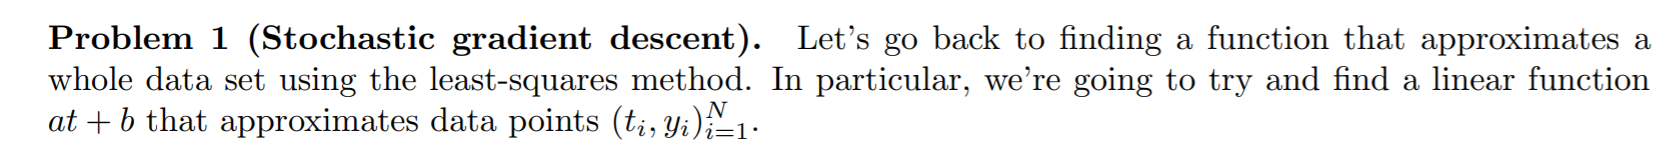

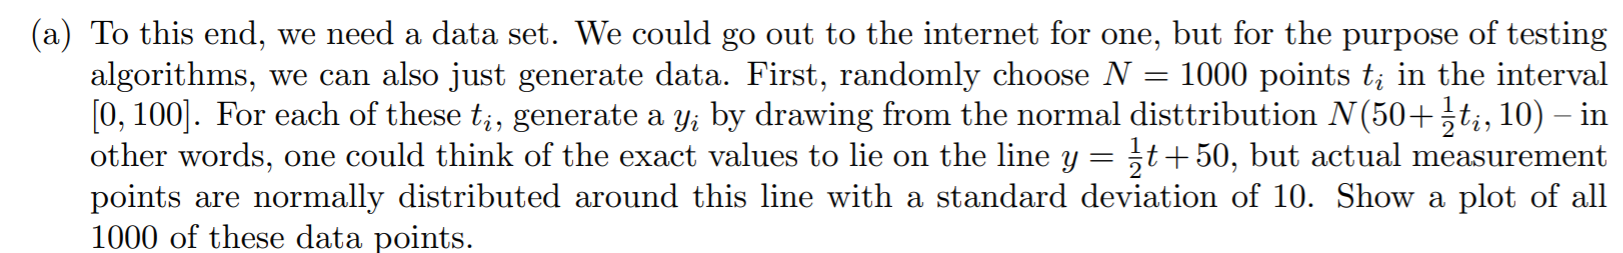

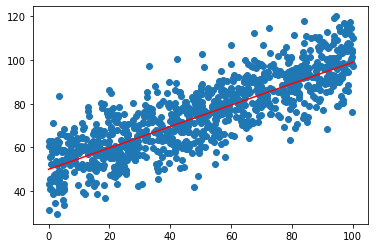

In [2]:
t=np.random.uniform(0,100,1000)
y=np.random.normal(50+t*(1/2),10)
x = np.linspace(0,100,100)
plt.scatter(t, y);
plt.plot(x,0.49*x+50,'-r')


    


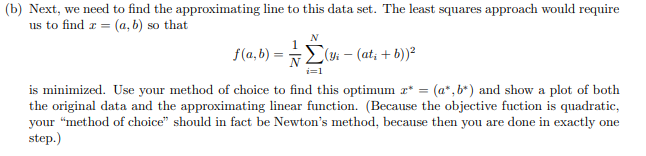

In [3]:
N=1000

def f(xk):
    a=xk[0]
    b=xk[1]
    sum=0
    for i in range(N):
        sum=sum+(y[i]-(a*t[i]+b))**2
    return 1.0/N*sum

def gradf(xk):
    a=xk[0]
    b=xk[1]
    N=len(t)
    sum=np.array([0,0]) 
    for i in range(N):
           sum = sum + np.array([2*(y[i] - (a*t[i]+b)) * (-t[i]),
                              2*(y[i] - (a*t[i]+b)) * (-1)])

    return 1/N*sum
def grad2f(xk) :
    a = xk[0]
    b = xk[1]
    N = len(t)
    sum= np.array([[0, 0],[0, 0]]);
    for i in range(N) :
        sum = sum + np.array([[2*(-t[i]) * (-t[i]),
                               2*(-1)*(-t[i])],
                              [2*(-t[i])* (-1),
                               2*(-1) * (-1)]])

    return 1.0/N * sum


def newton(xk):
    xk=xk
    for i in range(10):
        pk=-np.linalg.inv(grad2f(xk)).dot(gradf(xk))
        alphak=1
        xk=xk+alphak*pk
        print(xk)
    return xk;
    

In [4]:


xk=np.array([0,75])

newton(xk)

[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]


array([ 0.50166926, 50.30694272])

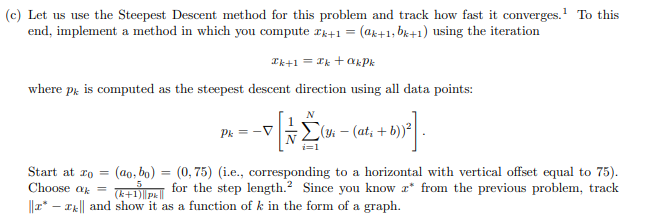

In [5]:
track = np.zeros((10000))
xstar=newton(xk)
def stpd(xk):
    xk=xk
    
    for i in range(10000):
        pk=-gradf(xk)
        alphak=5/((i+1)*np.linalg.norm(pk,2))
        xk=xk+alphak*pk
        track[i]=np.linalg.norm(xstar-xk)
        
        
        
    
    
    

[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]


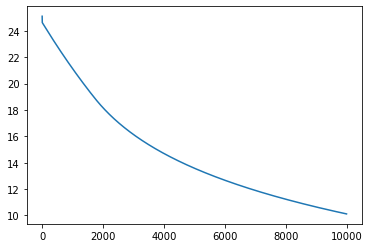

In [6]:

stpd(xk)
x=np.array(range(10000))


plt.plot(x,track)



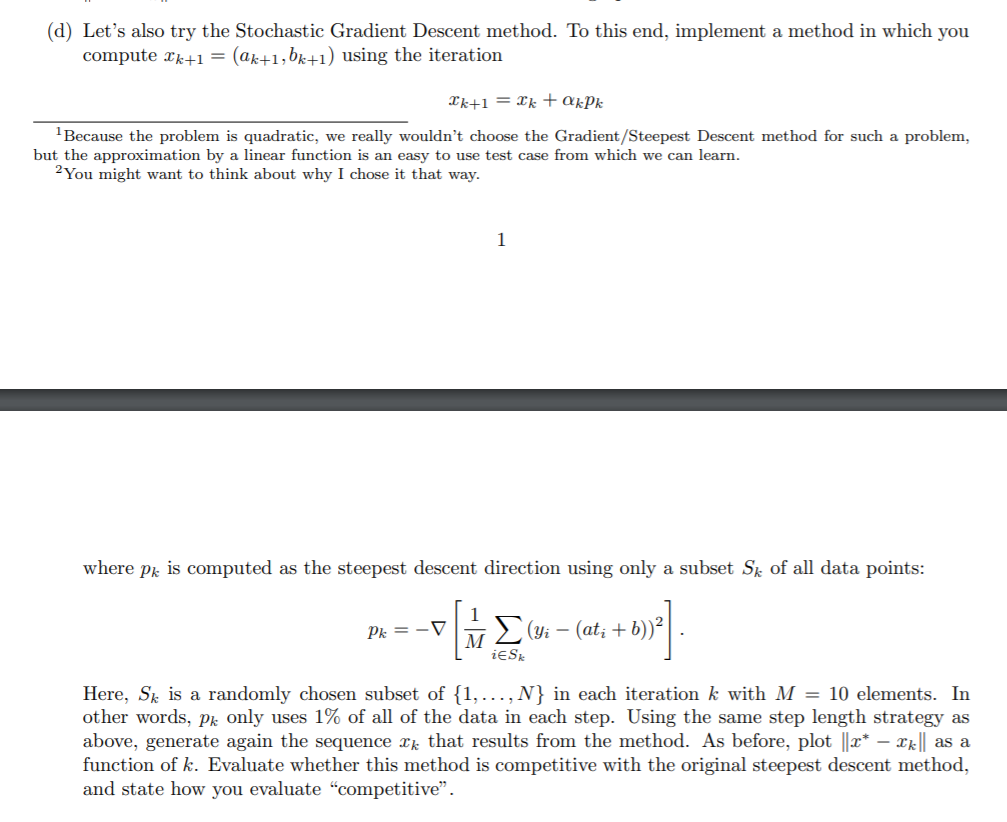

In [7]:
t2= t[np.random.randint(0,1000,10)]
y2= y[np.random.randint(0,1000,10)]

track2 = np.zeros((40000))
xstar=newton(xk)

def gradfs(xk):
    a=xk[0]
    b=xk[1]
    N=len(t2)
    sum=np.array([0,0]) 
    for i in range(N):
           sum = sum + np.array([2*(y2[i] - (a*t2[i]+b)) * (-t2[i]),
                              2*(y2[i] - (a*t2[i]+b)) * (-1)])
    return 1.0/N*sum

def stochastic(xk):
    xk=xk
    
    
    for i in range(40000):
        
        pk=-gradfs(xk)
       
        alphak=5/((i+1)*np.linalg.norm(pk,2))
        xk=xk+alphak*pk
        track2[i]=np.linalg.norm(xstar-xk)
        

[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]
[ 0.50166926 50.30694272]


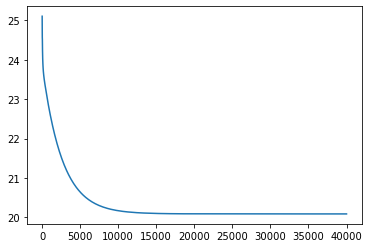

In [8]:
xk=np.array([0,75])

stochastic(xk)
x=np.array(range(40000))
plt.plot(x,track2)


If we consider number of iterations as compentiveness, I would not say that stochastic is very competitive with the regular steepest descent in this case, since in 40000 iterations the stochastic method did not get even close to where the regular method got in 10000.

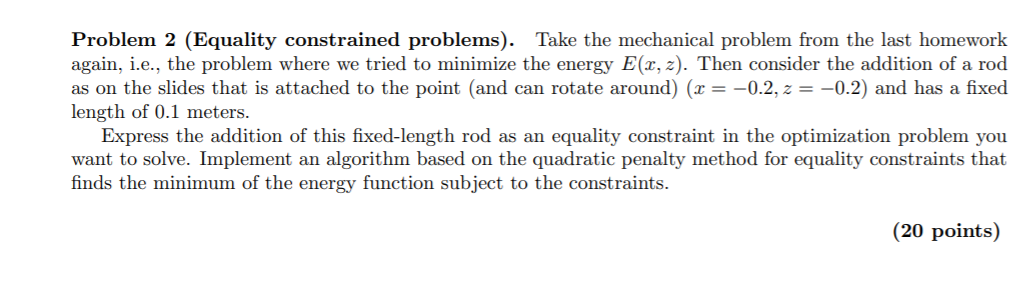


In [80]:

m= 0.5
G=9.81
D=300
l0=0.2

attachment_points= np.array([[-0.2,0],[0.05,0],[0.15,0]])

def spring_length(x_vec,i):
    return np.linalg.norm(x_vec-attachment_points[i])
def energy(xk):
    x=xk[0]
    z=xk[1]
    return (m*G*z+0.5*D*(spring_length(xk,0)-l0)**2+0.5*D*(spring_length(xk,1)-l0)**2+0.5*D*(spring_length(xk,2)-l0)**2)
def grad_energy(xk):
    x=xk[0]
    z=xk[1]
    spring_lengths=np.array([spring_length(xk,0),spring_length(xk,1),spring_length(xk,2)])
    
    
    
    
    gradient= np.array([D*(spring_lengths[0]-l0)*
                       (x-attachment_points[0][0])/spring_lengths[0]
                        + 
                        D*(spring_lengths[1]-l0)*
                       (x-attachment_points[1][0])/spring_lengths[1]
                        +
                        D*(spring_lengths[2]-l0)*
                       (x-attachment_points[2][0])/spring_lengths[2]
                        ,
                        m*G
                        +
                        D*(spring_lengths[0]-l0)*
                       (z-attachment_points[0][1])/spring_lengths[0]
                        +
                         D*(spring_lengths[1]-l0)*
                       (z-attachment_points[1][1])/spring_lengths[1]
                        +
                         D*(spring_lengths[2]-l0)*
                       (z-attachment_points[2][1])/spring_lengths[2]
                       ])
    return gradient

def g(xk):
    x=xk[0]
    z=xk[1]
    return (np.sqrt((x+0.2)**2) +(z+0.2)**2 -0.1)

def grad_g(xk):
    x=xk[0]
    z=xk[1]
    
    return np.array([(x+0.2)/np.sqrt((x+0.2)**2),2*(z+0.2) ])
def Qmu(xk,mu):
    return energy(xk)+mu*g(xk)**2

def gradqmu(xk,mu):
    return grad_energy(xk)+mu*g(xk)*grad_g(xk)


def stepl(xk,pk,mu):
    alpha=1
    rho=0.7
    c=0.6
    mu=mu
    while(not(Qmu(xk+alpha*pk,mu)<= Qmu(xk,mu)+c*alpha*(gradqmu(xk,mu).dot(pk)))):
        alpha=rho*alpha
    return alpha


def steep(xk,mu):
    xk=xk
    mu=mu
    for i in range(5000):
        pk=-gradqmu(xk,mu)
        alphak= stepl(xk,pk,mu)
        xk=xk+alphak*pk
        
        
    return xk;
        
def findmin(x0):
    mu=1
    xkmu=x0
    
    for i in range(10):
        xkmu= steep(xkmu,mu)
        print("xk is ",xkmu,"mu is",mu)
        mu=mu*10
        
    return xkmu
        

In [81]:
x0=np.array([0,0])

findmin(x0)

xk is  [-0.03607634 -0.15007714] mu is 1
xk is  [-0.03842862 -0.15070654] mu is 10
xk is  [-0.06292327 -0.15094955] mu is 100
xk is  [-0.094161   -0.15104866] mu is 1000
xk is  [-0.10144578 -0.15114741] mu is 10000
xk is  [-0.10225023 -0.15112781] mu is 100000
xk is  [-0.10237544 -0.15113196] mu is 1000000
xk is  [-0.10238624 -0.15113195] mu is 10000000
xk is  [-0.10238792 -0.15113203] mu is 100000000
xk is  [-0.10238806 -0.15113204] mu is 1000000000


array([-0.10238806, -0.15113204])

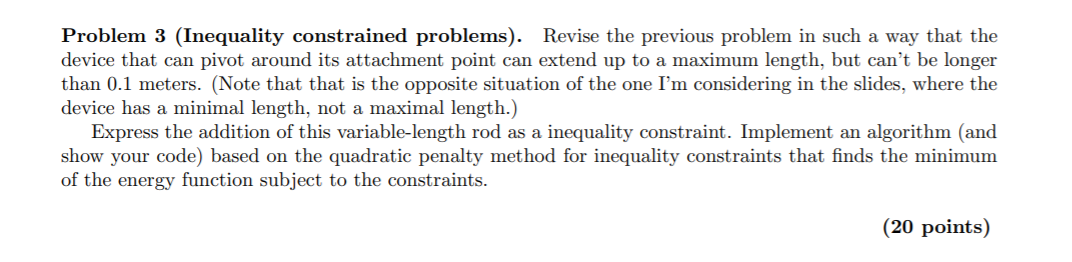

In [93]:
def g(xk):
    x=xk[0]
    z=xk[1]
    return (0.1-np.sqrt((x+0.2)**2) +(z+0.2)**2 )

def grad_g(xk):
    x=xk[0]
    z=xk[1]
    
    return np.array([(x+0.2)/np.sqrt((x+0.2)**2),2*(z+0.2) ])
def Qmu(xk,mu):
    if(g(xk)>0.1):
        return energy(xk)+mu*g(xk)**2
    else:
        return energy(xk)

def gradqmu(xk,mu):
    return grad_energy(xk)+mu*g(xk)*grad_g(xk)


def stepl(xk,pk,mu):
    alpha=1
    rho=0.7
    c=0.6
    mu=mu
    while(not(Qmu(xk+alpha*pk,mu)<= Qmu(xk,mu)+c*alpha*(gradqmu(xk,mu).dot(pk)))):
        alpha=rho*alpha
    return alpha


def steep(xk,mu):
    xk=xk
    mu=mu
    for i in range(5000):
        pk=-gradqmu(xk,mu)
        alphak= stepl(xk,pk,mu)
        xk=xk+alphak*pk
        
        
    return xk;
        
def findmin(x0):
    mu=1
    xkmu=x0
    
    for i in range(10):
        xkmu= steep(xkmu,mu)
        print("xk is ",xkmu,"mu is",mu)
        mu=mu*10
        
    return xkmu

In [94]:
x0=np.array([0,0])

findmin(x0)

xk is  [-0.03572742 -0.15015589] mu is 1
xk is  [-0.03572742 -0.15015589] mu is 10
xk is  [-0.03572742 -0.15015589] mu is 100
xk is  [-0.03572742 -0.15015589] mu is 1000
xk is  [-0.03572742 -0.15015589] mu is 10000
xk is  [-0.03572742 -0.15015589] mu is 100000
xk is  [-0.03572742 -0.15015589] mu is 1000000
xk is  [-0.03572742 -0.15015589] mu is 10000000
xk is  [-0.03572742 -0.15015589] mu is 100000000
xk is  [-0.03572742 -0.15015589] mu is 1000000000


array([-0.03572742, -0.15015589])

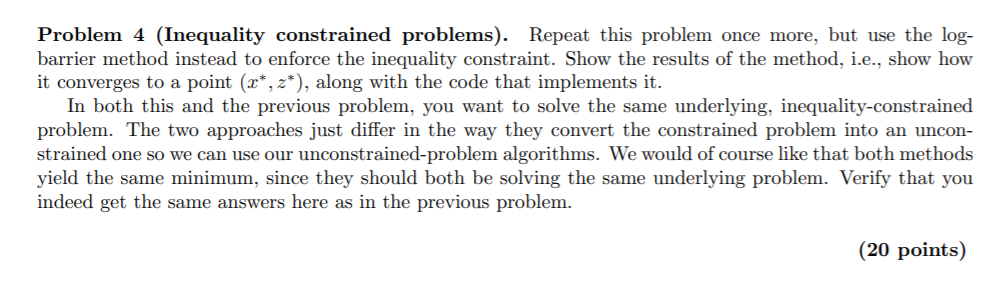

In [91]:
def g(xk):
    x=xk[0]
    z=xk[1]
    return math.log(abs((0.1-np.sqrt((x+0.2)**2) +(z+0.2)**2)) )

def grad_g(xk):
    x=xk[0]
    z=xk[1]
    
    return np.array([(x+0.2)/np.sqrt((x+0.2)**2),2*(z+0.2) ])
def Qmu(xk,mu):
    return energy(xk)+mu*np.minimum(0,g(xk)**2)

def gradqmu(xk,mu):
    return grad_energy(xk)+mu*g(xk)*grad_g(xk)


def stepl(xk,pk,mu):
    alpha=1
    rho=0.7
    c=0.6
    mu=mu
    while(not(Qmu(xk+alpha*pk,mu)<= Qmu(xk,mu)+c*alpha*(gradqmu(xk,mu).dot(pk)))):
        alpha=rho*alpha
    return alpha


def steep(xk,mu):
    xk=xk
    mu=mu
    for i in range(5000):
        pk=-gradqmu(xk,mu)
        alphak= stepl(xk,pk,mu)
        xk=xk+alphak*pk
        
        
    return xk;
        
def findmin(x0):
    mu=1
    xkmu=x0
    
    for i in range(10):
        xkmu= steep(xkmu,mu)
        print("xk is ",xkmu,"mu is",mu)
        mu=mu*10
        
    return xkmu

In [95]:
x0=np.array([0,0])

findmin(x0)

xk is  [-0.03572742 -0.15015589] mu is 1
xk is  [-0.03572742 -0.15015589] mu is 10
xk is  [-0.03572742 -0.15015589] mu is 100
xk is  [-0.03572742 -0.15015589] mu is 1000
xk is  [-0.03572742 -0.15015589] mu is 10000
xk is  [-0.03572742 -0.15015589] mu is 100000
xk is  [-0.03572742 -0.15015589] mu is 1000000
xk is  [-0.03572742 -0.15015589] mu is 10000000
xk is  [-0.03572742 -0.15015589] mu is 100000000
xk is  [-0.03572742 -0.15015589] mu is 1000000000


array([-0.03572742, -0.15015589])

Our group doesn't really have any idea to concrete, we really liked the optimization problems related to neural networks, unforntunately due to my illness this week, I'm a little bit behind with my research, however, I hope to catch up soon I found some interesting papers already mostly related to economics that I plan to read this week.